In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle

from scipy import stats
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import r2_score, mean_squared_error

%matplotlib inline

from sklearn.ensemble import RandomForestRegressor


In [6]:
lafd = pd.read_csv('./data/new_lafd_census_raw_metrics.csv', index_col=0)
lafd['year'] =lafd['year'].astype('str')
lafd.drop(columns=['dispatch_sequence', 'randomized_incident_number',
                   'incident_creation_time_secs',
                  'time_of_dispatch_secs', 'en_route_time_secs', 'on_scene_time_secs',
                   'turnout_time', 'travel_time'
                  ], inplace=True)


lafd.drop(lafd[lafd['year'] == '2013'].index, 0, inplace=True)
lafd.drop(lafd[lafd['year'] == '2014'].index, 0, inplace=True)
lafd.drop(lafd[lafd['year'] == '2015'].index, 0, inplace=True)
lafd['year'] = lafd['year'].astype('int')

/Users/jameslee/anaconda3/lib/python3.6/site-packages/numpy/lib/arraysetops.py:569: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


In [7]:
lafd['quarter'] = lafd['quarter'].astype('str')
lafd['first_in_district'] = lafd['first_in_district'].astype('str')

In [8]:
lafd.dtypes

dispatch_status       object
first_in_district     object
ppe_level             object
unit_type             object
nc_name               object
total_pop            float64
white_pop            float64
black_pop            float64
ameri_es_pop         float64
asian_pop            float64
hawn_pi_pop          float64
other_pop            float64
multi_pop            float64
in_poverty           float64
owner_occ            float64
renter_occ           float64
call_process_time      int64
response_time          int64
year                   int64
quarter               object
regions               object
dtype: object

In [10]:
lafd_dummy = pd.get_dummies(lafd, drop_first=True)

In [11]:
X = lafd_dummy.drop(columns=['response_time','year'])
y = lafd_dummy['response_time']

X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y, 
                                                    random_state= 42, 
                                                    test_size = 0.3);

In [23]:
rf= RandomForestRegressor(random_state=42)

rf.fit(X_train, y_train)
print(rf.score(X_train, y_train))
print(rf.score(X_test, y_test))

/Users/jameslee/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


0.6097618052770264
0.05766408049678363


Text(0, 0.5, 'Feature')

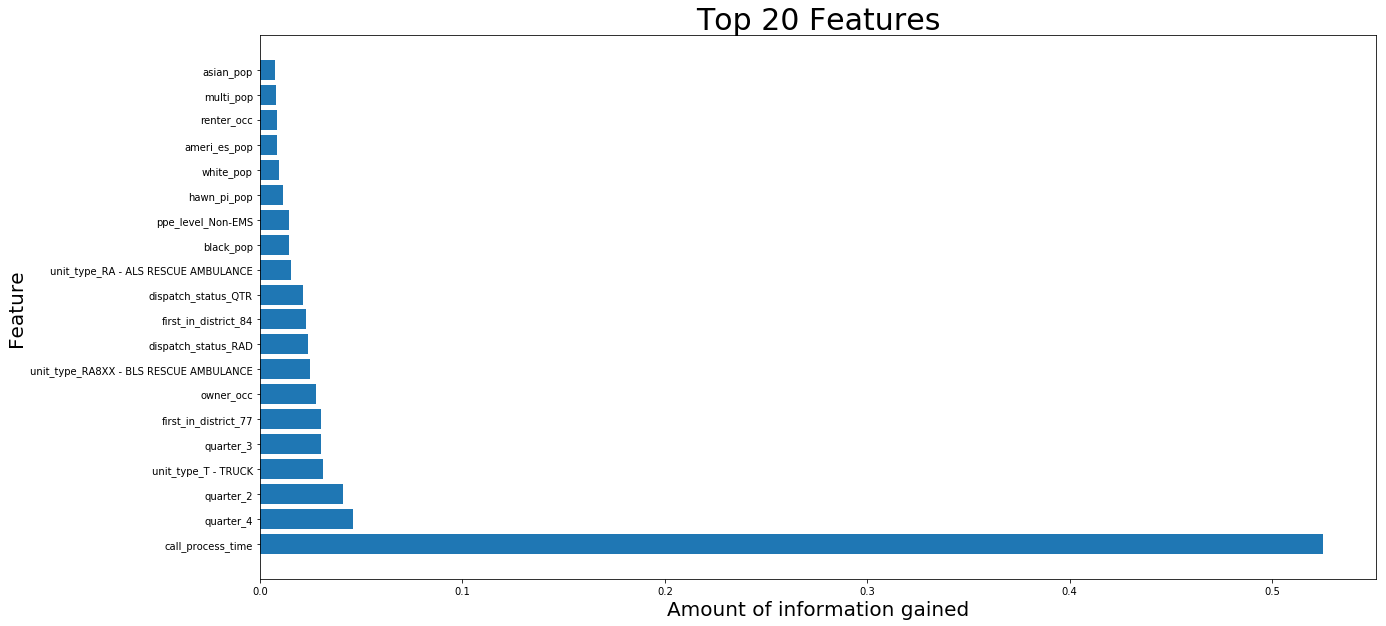

In [29]:
feat_importance = pd.DataFrame(rf.feature_importances_,  
                               X.columns, 
                               columns=['importance'])
plt.figure(figsize=(20,10))
temp = feat_importance.sort_values('importance', ascending=False).head(10)
plt.barh(temp.index, temp['importance'])
plt.title('Top 20 Features', fontsize=30)
plt.xlabel('Amount of information gained', fontsize=20)
plt.ylabel('Feature', fontsize=20)


In [26]:
cross_val_score(rf, X_train, y_train, cv=3).mean()

0.012776854652496969

In [ ]:
rf= RandomForestRegressor(random_state=42)

params = {
    'min_samples_split':[2, 5],
    'n_estimators':[100, 115],
    'max_depth': [None, 5, 10]
    
}

gs = GridSearchCV(rf, 
                  param_grid=params, 
                  return_train_score=True,
                  cv=3)

gs.fit(X_train, y_train)
print(gs.best_score_) #cross val score from best_params_
print(gs.score(X_train, y_train))
print(gs.score(X_test, y_test))
gs.best_params_